# Pull data and github repo

The code is heavily referenced from https://www.learnpytorch.io/

In [6]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_PROJECT_PATH = "/content/drive/MyDrive/animal-classification"
MODEL_FOLDER = "models"
LOG_FOLDER = "logs"
NOTEBOOK_FILE = "animal-classification.ipynb"
GITHUB_PROJECT_PATH = "/content/animals-10"
DATA_PATH = "/content/dataset/animals10/raw-img"

Mounted at /content/drive


In [7]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'animals10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F59760%2F840806%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240530%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240530T065741Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D55fed7b0a79aee07278d3bf8ee07e1bcc76a8fac79e9dc88d25bc4a73ecbf9ebca7fd16d9a9982b896c99969c7f0132c9e5eb6f50732c183382c38ba40aad851c55b8e736ea047d41eed11e5b4b55ffd6e782b789c45f2b427dac29beead372ff3bfcf097509a2118e10d6d507f2a87d6be0443166b89f61a7ddda6282c032bb23fcae408744a8d25da68df60a12dcc314606e522f6ddf0ba753bb20da9019eac5145a8a2266fe878731d44a45fbe6b8fb601fd796a386ce3bf594578caed467825df6fae8a9d5f76aa0215b9d36b23bc4ec4167962488c1f3d5b10f389d9deee3efd3ddb90594ea7626877042348f1b51b336307db9c2946742da4c35010d35'

KAGGLE_INPUT_PATH='dataset'

!umount /kaggle/input/ 2> /dev/null
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



[==================================================] 614087302 bytes downloaded
Downloaded and uncompressed: animals10
Data source import complete.


Pull from github and switch branch

In [8]:
!chmod +x config.sh
!./config.sh

Cloning into 'animals-10'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 197.53 KiB | 8.23 MiB/s, done.


In [9]:
%cd animals-10

/content/animals-10


In [11]:
!git branch training_loop
!git checkout training_loop

Switched to branch 'training_loop'


In [12]:
!git pull origin dataloader

From https://github.com/Mnsd05/animals-10
 * branch            dataloader -> FETCH_HEAD
Updating f44a558..b0a8854
Fast-forward
 animals10.ipynb       | 246 +---------------------------------------------------------------------
 utils/data_loaders.py |  19 ++++++
 utils/eda.py          |  85 ++++++++++++++++++++++++
 3 files changed, 105 insertions(+), 245 deletions(-)
 create mode 100644 utils/data_loaders.py
 create mode 100644 utils/eda.py


Push changes to github

In [13]:
!rm animals10.ipynb
!cp "/content/drive/MyDrive/animal-classification/animals10.ipynb" .

In [ ]:
!rm .gitignore
!touch .gitignore
!echo "__pycache__/" >> .gitignore

rm: cannot remove '.gitignore': No such file or directory


In [ ]:
!git add *
!git commit -m 'Add dataloader'  # commit in Colab
!git push origin dataloader

[dataloader b0a8854] Add dataloader
 3 files changed, 105 insertions(+), 245 deletions(-)
 rewrite animals10.ipynb (97%)
 create mode 100644 utils/data_loaders.py
 create mode 100644 utils/eda.py
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 194.29 KiB | 11.43 MiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
remote: 
remote: Create a pull request for 'dataloader' on GitHub by visiting:
remote:      https://github.com/Mnsd05/animals-10/pull/new/dataloader
remote: 
To https://github.com/Mnsd05/animals-10.git
 * [new branch]      dataloader -> dataloader


 # 1.Setup

In [14]:
import torch

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

# 2. EDA

In [17]:
from utils.eda import plot_num_instances, plot_image_sizes, show_random_images
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}

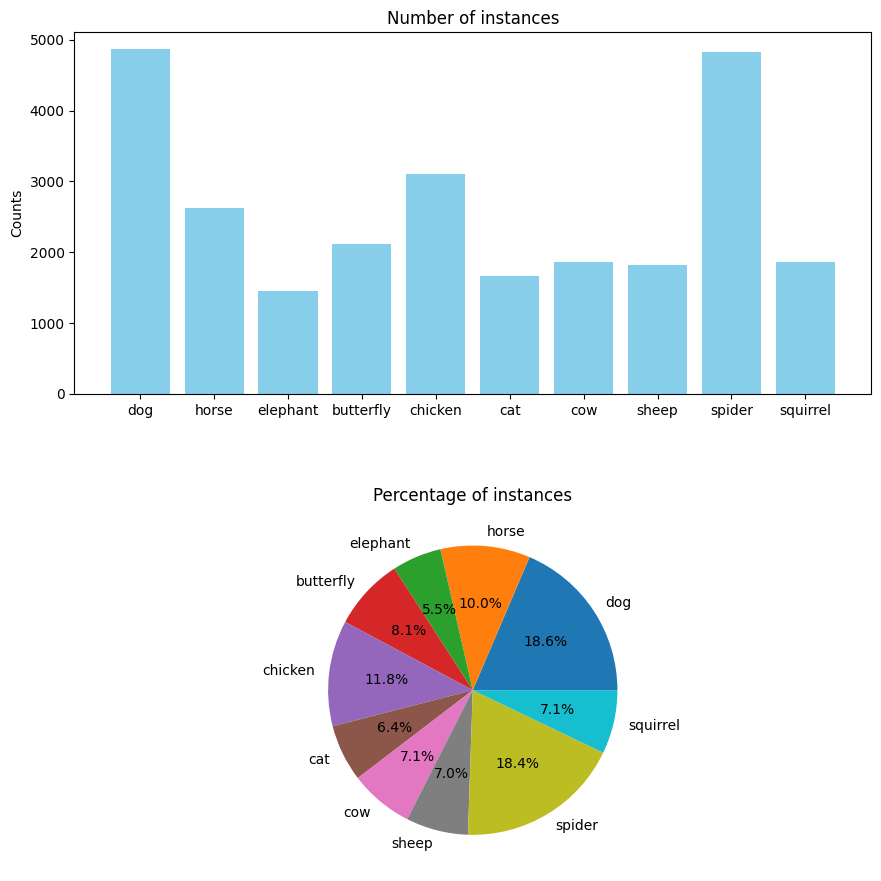

In [18]:
plot_num_instances(translate, DATA_PATH)

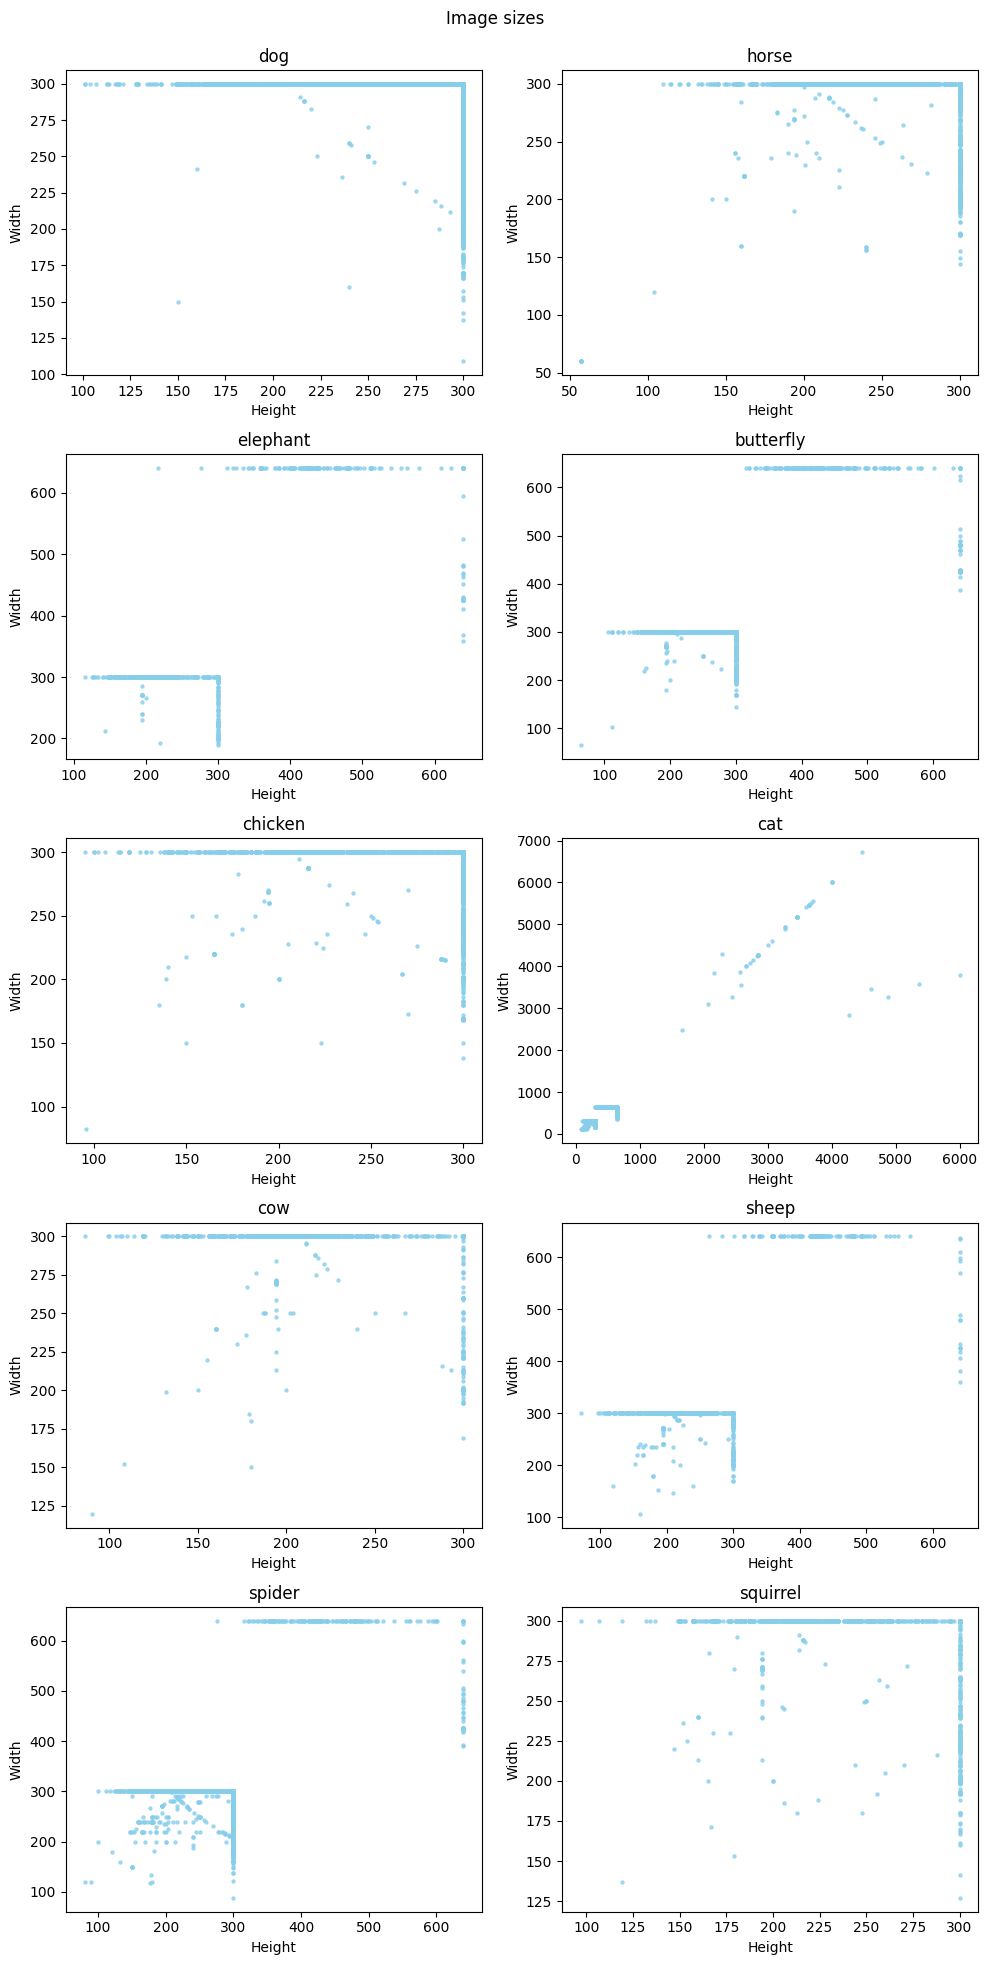

In [ ]:
plot_image_sizes(translate, DATA_PATH)

In [ ]:
show_random_images(translate, DATA_PATH)

Output hidden; open in https://colab.research.google.com to view.

# 3. Create Datasets and DataLoaders

In [19]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = ImageFolder(DATA_PATH, transform = transform)

In [20]:
from utils.data_loaders import create_data_loaders
num_workers = os.cpu_count()
batch_size = 32
dataloader_dict = create_data_loaders(dataset, ["train", "test"], [0.8, 0.2], batch_size, num_workers)

In [21]:
train_dataloader = dataloader_dict["train"]
test_dataloader = dataloader_dict["test"]

# 4. Train and tune models

In [22]:
# %%writefile /content/animals-10/models/alexnet.py
"""
Contains PyTorch model code to instantiate a Alexnet model.
"""
import torch
from torch import nn

class Alexnet(nn.Module):
  def __init__(self, num_classes: int) -> None:
      super().__init__()
      self.features = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2),
          nn.ReLU(inplace = True),
          nn.MaxPool2d(kernel_size=3, stride=2, padding=0),

          nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
          nn.ReLU(inplace = True),
          nn.MaxPool2d(kernel_size=3,stride=2, padding=0),

          nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
          nn.ReLU(inplace = True),

          nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
          nn.ReLU(inplace = True),

          nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=3,stride=2, padding=0)
      )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=9216,out_features=4096),
          nn.ReLU(inplace=True),
          nn.Linear(in_features=4096,out_features=4096),
          nn.ReLU(inplace=True),
          nn.Linear(in_features=4096,out_features=num_classes)
      )

  def forward(self, x: torch.Tensor):
      x = self.classifier(self.features(x))
      return x


In [23]:
from torchsummary import summary
alexnet = Alexnet(10).to(device)
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
          Flatten-14                 [-

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.parameters(), lr = 0.001)

In [60]:
from utils.engine import train

In [61]:
train(alexnet, train_dataloader, test_dataloader, optimizer, loss_fn, 10, device)

Epoch 1:   1%|          | 5/655 [00:36<1:18:04,  7.21s/batch]


KeyboardInterrupt: 